In [ ]:
!unzip /content/bird_dataset.zip -d /content


Archive:  /content/bird_dataset.zip
   creating: /content/bird_dataset/
   creating: /content/bird_dataset/images to predict/
  inflating: /content/bird_dataset/images to predict/1.jpg  
  inflating: /content/bird_dataset/images to predict/2.jpg  
  inflating: /content/bird_dataset/images to predict/3.jpg  
  inflating: /content/bird_dataset/images to predict/4.jpg  
  inflating: /content/bird_dataset/images to predict/5.jpg  
  inflating: /content/bird_dataset/images to predict/6.jpg  
   creating: /content/bird_dataset/test/
   creating: /content/bird_dataset/test/ABBOTTS BABBLER/
  inflating: /content/bird_dataset/test/ABBOTTS BABBLER/1.jpg  
  inflating: /content/bird_dataset/test/ABBOTTS BABBLER/2.jpg  
  inflating: /content/bird_dataset/test/ABBOTTS BABBLER/3.jpg  
  inflating: /content/bird_dataset/test/ABBOTTS BABBLER/4.jpg  
  inflating: /content/bird_dataset/test/ABBOTTS BABBLER/5.jpg  
   creating: /content/bird_dataset/test/ABBOTTS BOOBY/
  inflating: /content/bird_dataset/

Found 2574 images belonging to 20 classes.
Found 634 images belonging to 20 classes.
Class indices: {'ABBOTTS BABBLER': 0, 'ABBOTTS BOOBY': 1, 'ABYSSINIAN GROUND HORNBILL': 2, 'AFRICAN CROWNED CRANE': 3, 'AFRICAN EMERALD CUCKOO': 4, 'AFRICAN FIREFINCH': 5, 'AFRICAN OYSTER CATCHER': 6, 'AFRICAN PIED HORNBILL': 7, 'AFRICAN PYGMY GOOSE': 8, 'ALBATROSS': 9, 'ALBERTS TOWHEE': 10, 'ALEXANDRINE PARAKEET': 11, 'ALPINE CHOUGH': 12, 'ALTAMIRA YELLOWTHROAT': 13, 'AMERICAN AVOCET': 14, 'AMERICAN BITTERN': 15, 'AMERICAN COOT': 16, 'AMERICAN FLAMINGO': 17, 'AMERICAN GOLDFINCH': 18, 'AMERICAN KESTREL': 19}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,382,647 (16.72 MB)

 Trainable params: 4,340,624 (16.56 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 162s 557ms/step - accuracy: 0.0721 - loss: 2.9774 - val_accuracy: 0.0536 - val_loss: 3.0097
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 280ms/step - accuracy: 0.1665 - loss: 2.7989 - val_accuracy: 0.0536 - val_loss: 3.0237
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 286ms/step - accuracy: 0.3215 - loss: 2.5794 - val_accuracy: 0.1483 - val_loss: 2.8531
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 285ms/step - accuracy: 0.4913 - loss: 2.3094 - val_accuracy: 0.5426 - val_loss: 2.2314
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 286ms/step - accuracy: 0.6166 - loss: 2.0013 - val_accuracy: 0.4968 - val_loss: 2.1870
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 281ms/step - accuracy: 0.7025 - loss: 1.6940 - val_accuracy: 0.7902 - val_loss: 1.4152
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.7632 - loss: 1.3758 - val_accuracy: 0.7445 - val_loss: 1.4420
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 287ms/step - accuracy: 0.8330 - loss: 

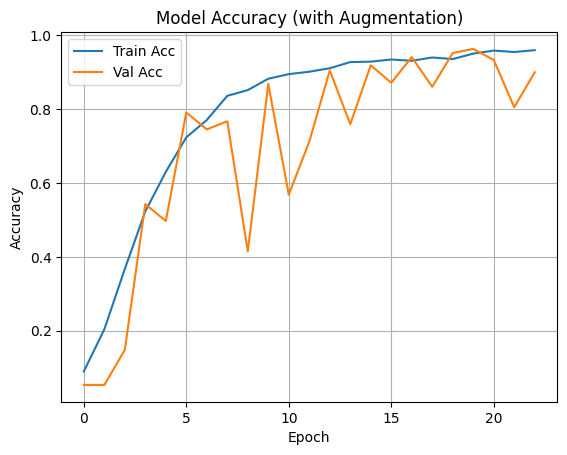

In [ ]:
# Step 1: Import Libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 2: Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 30
LEARNING_RATE = 1e-5
train_dir = "/content/bird_dataset/train"

# Step 3: Augmentation & Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.15,
    brightness_range=[0.8, 1.2]
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

NUM_CLASSES = train_data.num_classes
print("Class indices:", train_data.class_indices)

# Step 4: Build EfficientNetB0 Model
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)
base_model.trainable = True  # Fine-tune
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 5: Train with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Step 6: Save the model
model.save("/content/efficientnet_bird_model.keras")

# Step 7: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy (with Augmentation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model("/content/efficientnet_bird_model.keras")

# Path to your test image
img_path = "/content/5.jpg"  # Change to your test image path

# Preprocess the image (✅ use 224x224)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_index = np.argmax(pred[0])

# Class labels (must match training)
class_labels = ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL',
                'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH',
                'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE',
                'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH',
                'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN',
                'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH',
                'AMERICAN KESTREL']

# Get class label
predicted_class = class_labels[predicted_index]

print("✅ Predicted Bird Species:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
✅ Predicted Bird Species: AFRICAN EMERALD CUCKOO


In [ ]:
!pip install flask flask-ngrok tensorflow


In [ ]:
# ✅ Step 1: Install required packages
!pip install -q pyngrok flask flask-cors

# ✅ Step 2: Set your ngrok auth token here
NGROK_AUTH_TOKEN = "2p1q8ytHTigMUIt7vRC89HnZhvV_2xscRv4Hmzhxfc4JK1Pe"  # 🔁 Replace with your own token from https://dashboard.ngrok.com/get-started/setup

# ✅ Step 3: Import libraries
import os
import numpy as np
import tensorflow as tf
from flask import Flask, request, jsonify
from flask_cors import CORS
from pyngrok import ngrok
from tensorflow.keras.preprocessing import image
from werkzeug.utils import secure_filename

# ✅ Step 4: Load your trained model
model = tf.keras.models.load_model("/content/efficientnet_bird_model.keras")

# ✅ Step 5: Define class labels
class_labels = ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL',
                'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH',
                'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE',
                'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH',
                'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN',
                'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH',
                'AMERICAN KESTREL']

# ✅ Step 6: Flask app setup
app = Flask(__name__)
CORS(app)
UPLOAD_FOLDER = '/content/uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# ✅ Step 7: Define /predict route
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No file selected'}), 400

    filename = secure_filename(file.filename)
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    file.save(filepath)

    # Preprocess image
    img = image.load_img(filepath, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    predicted_index = np.argmax(pred[0])
    predicted_class = class_labels[predicted_index]

    return jsonify({'prediction': predicted_class})

# ✅ Step 8: Start ngrok and Flask
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
public_url = ngrok.connect(5000)
print("🚀 Public URL:", public_url)

app.run()


🚀 Public URL: NgrokTunnel: "https://3f15513de210.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


INFO:werkzeug:127.0.0.1 - - [22/Jul/2025 18:08:40] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


INFO:werkzeug:127.0.0.1 - - [22/Jul/2025 18:09:37] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


INFO:werkzeug:127.0.0.1 - - [22/Jul/2025 18:11:52] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


INFO:werkzeug:127.0.0.1 - - [22/Jul/2025 18:13:44] "POST /predict HTTP/1.1" 200 -


In [ ]:
# Zip model and dataset
!zip -r bird_project.zip /content/efficientnet_bird_model.keras /content/bird_dataset


  adding: content/efficientnet_bird_model.keras (deflated 10%)
  adding: content/bird_dataset/ (stored 0%)
  adding: content/bird_dataset/train/ (stored 0%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/ (stored 0%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/013.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/071.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/184.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/131.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/099.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/182.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/025.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/143.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRICAN PIED HORNBILL/046.jpg (deflated 1%)
  adding: content/bird_dataset/train/AFRIC

In [ ]:
from google.colab import files
files.download('bird_project.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/efficientnet_bird_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>